In [2]:
library("tidyr")
library("ggplot2")
library("dplyr")
# wheel_example_fname = "../data/MoBlue_timeseries/32091307852472121783sjgbfSB.csv"
# wheel.df <- read.csv(wheel_example_fname)
# masses  = scan("masses.txt")
# wheel.df$mass <- masses
# ball_example_fname = "../data/MoBlue_timeseries/100258850938785994230ABAyHzu.csv"
# ball.df <- read.csv(ball_example_fname)
# ball.df$mass <- masses


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [124]:
read_and_label_df <- function(fname, num.time = 100, start = 3){
    my.df<- read.csv(fname, stringsAsFactors = FALSE)
    masses  = scan("masses.txt")
    my.df$mass <- masses
    new_names <- as.numeric(unlist(strsplit(names(my.df)[start:(start+num.time-1)],"X"))[seq(2,2*num.time,2)])
    names(my.df)[start:(start+num.time-1)] <- new_names
    return(my.df)
}

make_ts_df <- function(fname){
    my.df <- read_and_label_df(fname)
    my.df$label = "NULL"
    
    my.df[which(my.df$molecule == "Mo1"),]$label = "Mo1"
    my.df[which(my.df$molecule == "Mo2"),]$label = "Mo2"
    my.df[which(my.df$molecule == "edgeMo2"),]$label = "edgeMo2"
    my.df[which(my.df$molecule == "Mo6"),]$label = "Mo6"
    my.df[which(my.df$molecule == "Mo36"),]$label = "Mo36"
    my.df[which(my.df$molecule == "(Mo6)12_(edgeMo2)30"),]$label = "Ball"
    my.df[which(my.df$molecule == "(Mo6)14_(Mo2)28_(Mo1)14"),]$label = "Wheel"
    
    mo6_intermediates = scan("mo6_intermediates.txt", character())
    my.df[which(my.df$molecule %in% mo6_intermediates),]$label <- "Mo6 Intermediates"
    mo36_intermediates = scan("mo36_intermediates.txt",character())
    my.df[which(my.df$molecule %in% mo36_intermediates),]$label <- "Mo36 Intermediates"
    ball_intermediates = scan("ball_intermediates.txt",character())
    my.df[which(my.df$molecule %in% ball_intermediates),]$label <- "Ball Intermediates"
    wheel_intermediates = scan("wheel_intermediates.txt", character())
    my.df[which(my.df$molecule %in% wheel_intermediates),]$label <- "Wheel Intermediates"
    ts.df <- gather(my.df, time, abundance, -molecule, -mID, -mass, -label)
    ts.df$mass_raw = ts.df$mass*ts.df$abundance
    ts.df$time <- as.numeric(ts.df$time)
    return(ts.df)
}




In [180]:
ggsave("WheelFormation.jpeg",p.wheel.main)

Saving 6.67 x 6.67 in image
Warning message:
"Transformation introduced infinite values in continuous y-axis"

In [179]:
wheel.intermediates.compounds <- c("Mo6 Intermediates", "Mo36 Intermediates", "Wheel Intermediates")
wheel.intermediate.ts <- wheel.agg[which(wheel.agg$label %in% wheel.intermediates.compounds),]

head(wheel.intermediate.ts)
p.wheel.intermediate <- ggplot(wheel.intermediate.ts) + geom_point(aes(x = time, y = x, color = label)) + 
     theme_classic() + 
     scale_y_log10() + 
     scale_x_continuous(breaks = seq(0, 10, by = 1)) + 
     labs(y = "Fraction of Molybdenum", x = "Time", color = " ", title = "Wheel Intermediates Example") +
     theme(plot.title = element_text(hjust = 0.5)) + 
     theme(text = element_text(size=16))+
    theme(legend.position="bottom")
ggsave("WheelIntermediates.jpeg",p.wheel.intermediate)

,time,label,x
601,0.0,Mo36 Intermediates,0.0000000
602,0.1,Mo36 Intermediates,0.0046478
603,0.2,Mo36 Intermediates,0.0049115
604,0.3,Mo36 Intermediates,0.0046115
605,0.4,Mo36 Intermediates,0.0041702
606,0.5,Mo36 Intermediates,0.0039408


Saving 6.67 x 6.67 in image
Warning message:
"Transformation introduced infinite values in continuous y-axis"

In [177]:
ball.main.compounds <- c("Mo1", "edgeMo2", "Mo6", "Mo36", "Ball")
ball.main.ts <- ball.agg[which(ball.agg$label %in% ball.main.compounds),]
p.ball.main <- ggplot(ball.main.ts) + geom_point(aes(x = time, y = x, color = label)) + 
    theme_classic() + 
    scale_y_log10() + 
    scale_x_continuous(breaks = seq(0, 10, by = 1)) + 
    labs(y = "Fraction of Molybdenum", x = "Time", color = " ", title = "Ball Formation Example") +
    theme(plot.title = element_text(hjust = 0.5)) + 
    theme(text = element_text(size=16))+
    theme(legend.position="bottom")
ggsave("BallFormation.jpeg",p.ball.main)

Saving 6.67 x 6.67 in image
Warning message:
"Transformation introduced infinite values in continuous y-axis"

Warning message:
"Transformation introduced infinite values in continuous y-axis"

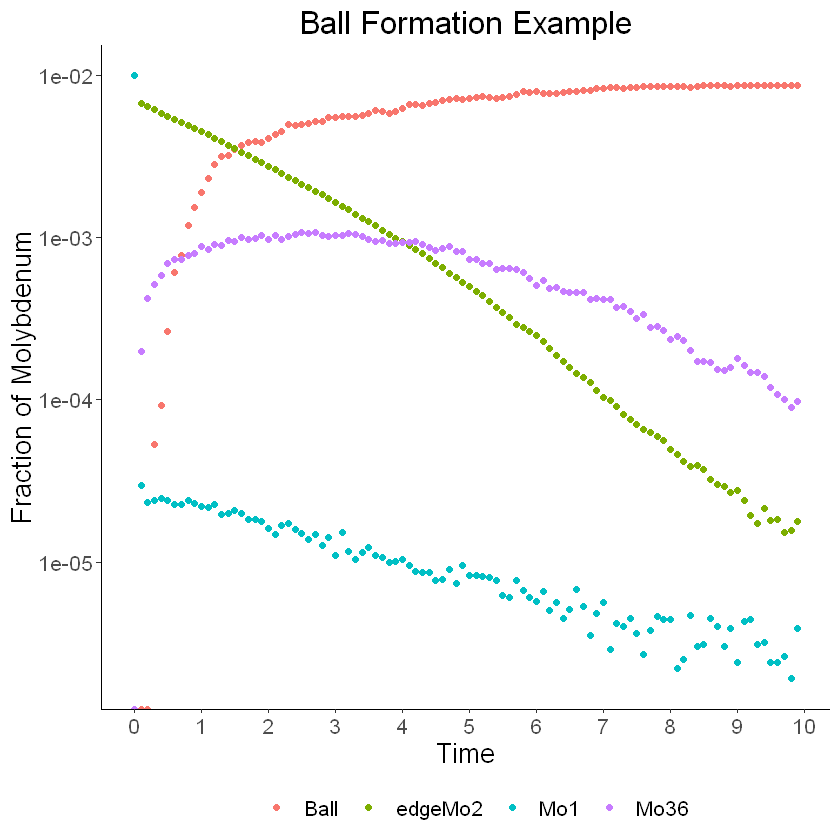

In [172]:
p.ball.main

In [176]:
ball.intermediates.compounds <- c("Mo6 intermediates", "Mo36 Intermediates", "Ball Intermediates")
ball.intermediates.ts <- ball.agg[which(ball.agg$label %in% ball.intermediates.compounds),]
p.ball.intermediates <- ggplot(ball.intermediates.ts) + geom_point(aes(x = time, y = x, color = label)) + 
    theme_classic() + 
    scale_y_log10() + 
    scale_x_continuous(breaks = seq(0, 10, by = 1)) + 
    labs(y = "Fraction of Molybdenum", x = "Time", color = " ", title = "Ball intermediates Example") +
    theme(plot.title = element_text(hjust = 0.5)) + 
    theme(text = element_text(size=16))+
    theme(legend.position="bottom")
ggsave("BallIntermediates.jpeg",p.ball.intermediates)

Saving 6.67 x 6.67 in image
Warning message:
"Transformation introduced infinite values in continuous y-axis"

Warning message:
"Transformation introduced infinite values in continuous y-axis"

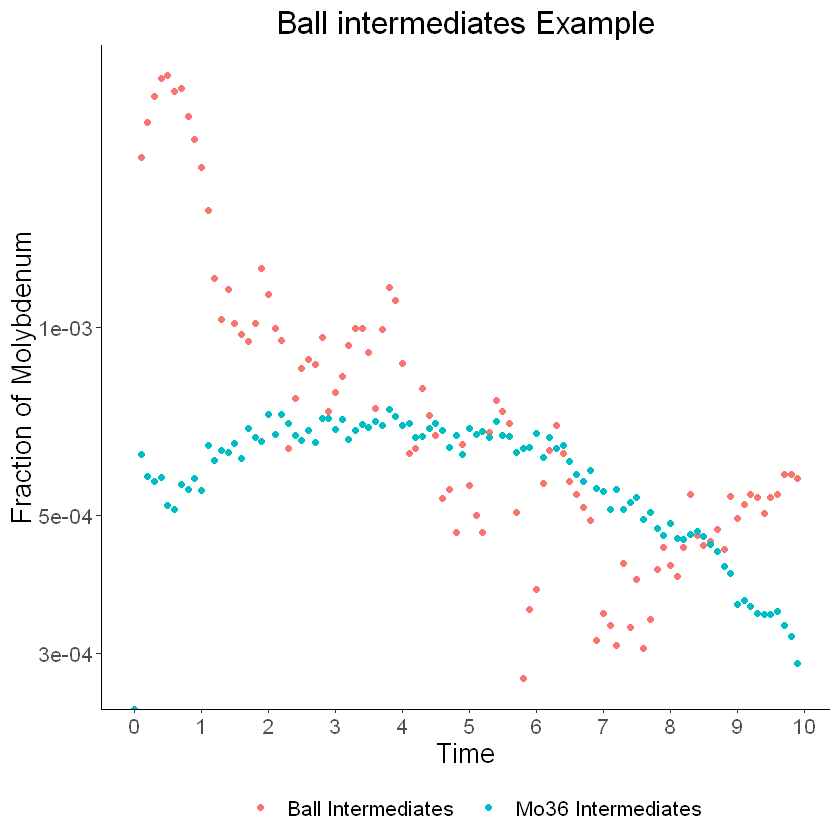

In [174]:
p.ball.intermediates

In [60]:
params_df  = read.csv("../data/MoBlue_Run_Parameters.csv", stringsAsFactors  = FALSE)

In [61]:
params_df = params_df[complete.cases(params_df),]

In [27]:
p <- ggplot(params_df) + geom_histogram(aes(x= dimerization_ratio)) + scale_x_log10()

In [127]:
get_ball_frac <- function(fname,time = 99.0 ){
    
    ts.df <- make_ts_df(fname)
    ball.df <- ts.df[which(ts.df$label == "Ball"),]
    ball.frac  <- ball.df[which(round(ball.df$time,digits = 1) == time),]$mass_raw
    return(ball.frac)
}

get_wheel_frac <- function(fname){
     time = 99.0
    ts.df <- make_ts_df(fname)
    wheel.df <- ts.df[which(ts.df$label == "Wheel"),]
    wheel.frac  <- wheel.df[which(round(wheel.df$time,digits = 1) == time),]$mass_raw
    return(wheel.frac)
}

In [72]:
params_df$save_name <- as.character(params_df$save_name)

In [88]:
trial_out = get_ball_frac(params_df$save_name[120])

  mID molecule mass             label time abundance mass_raw mass_frac
1   1 Mo36*Mo1   37 Mo6 Intermediates    0         0        0 0.0000000
2   2      Mo1    1               Mo1    0     99998    99998 0.0099998
3   3 Mo36*Mo2   38 Mo6 Intermediates    0         0        0 0.0000000
4   4      Mo2    2               Mo2    0         1        2 0.0000002
5   5 Mo36*Mo3   39 Mo6 Intermediates    0         0        0 0.0000000
6   6      Mo3    3 Mo6 Intermediates    0         0        0 0.0000000
[1] 0


In [78]:
sub_df <- params_df[1:10,]
head(sub_df)



T,volume,k_f,stable_backward,R,mo36_enhance,wheel_enhancement_multiplier,ball_enhance,dimerization_ratio,save_name
300,1,0.01,1,8.31446,1,1000,1000,4.329881e+00,../data/MoBlue_timeseries/16880651504391989741Ar42Rpl6.csv
300,1,0.01,1,8.31446,1,1000,1000,5.847465e+00,../data/MoBlue_timeseries/2967497634502052968P7md8osu.csv
300,1,0.01,1,8.31446,1,1000,1000,3.704234e-01,../data/MoBlue_timeseries/18387456924582107222fp88bEDb.csv
300,1,0.01,1,8.31446,1,1000,1000,3.778325e-01,../data/MoBlue_timeseries/17804707699707572981DAjXPTH5.csv
300,1,0.01,1,8.31446,1,1000,1000,4.316087e-01,../data/MoBlue_timeseries/2984852926208443222znpK5qSw.csv
300,1,0.01,1,8.31446,1,1000,1000,8.709615e-05,../data/MoBlue_timeseries/7133786595328778415pLmV2637.csv


In [82]:
trial_out

numeric(0)

No traceback available 


In [128]:
vec_ball <- Vectorize(get_ball_frac, SIMPLIFY=TRUE)
vec_wheel <- Vectorize(get_wheel_frac, SIMPLIFY=TRUE)

In [129]:
ball <- vec_ball(params_df$save_name)
wheel <- vec_wheel(params_df$save_name)

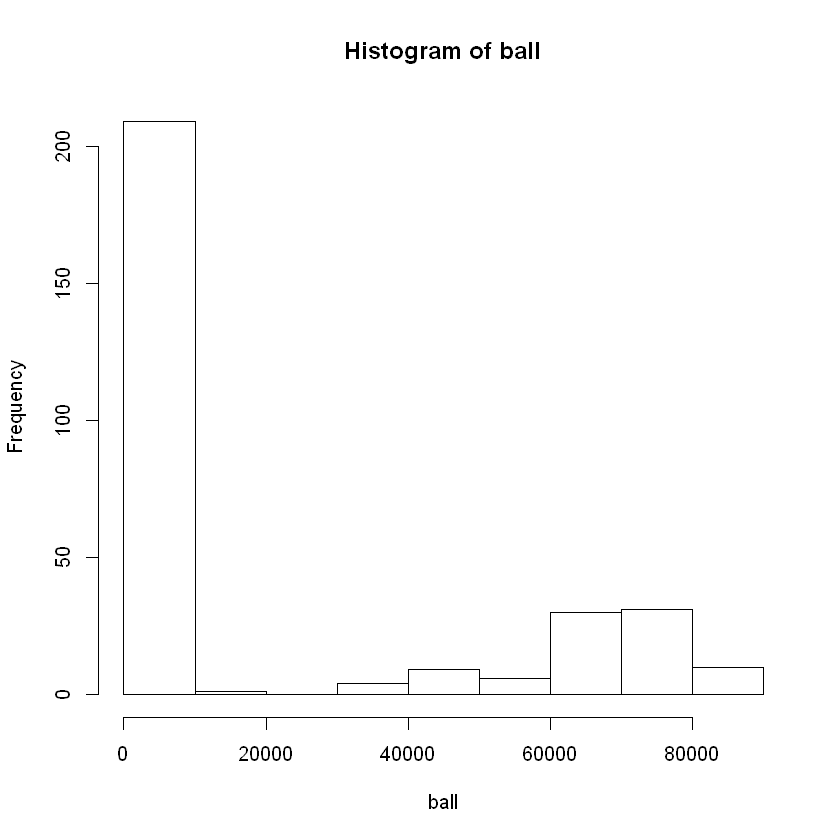

In [130]:
ball <- unlist(ball)
hist(ball)

In [138]:
params_df$wheel <- wheel/1E5
params_df$ball <- ball/1e5

In [160]:
p <- ggplot(params_df) + geom_point(aes(x = dimerization_ratio, y = ball), color= 'blue') + scale_x_log10() + geom_point(aes(x = dimerization_ratio, y = wheel), color = "red")

In [161]:
p <- p + theme_minimal() + labs(y = "Fraction of End Product", x = "Relative Rate of Dimerization (Reduction)")
p<- p + annotate("text", label = "The wheel forms as the primary product \n when the reduced dimers form slowly", x = 5*1E-4, y = 0.5, size = 4, colour = "red") + 
annotate("text", label = "The ball forms when the reduced dimers \n form quickly but not too quickly", x = 1, y = 0.9, size = 4, colour = "blue")

In [162]:
ggsave("Ball_Wheel_transition.jpeg",p)

Saving 6.67 x 6.67 in image
